In [9]:
#Portfolio Allocation
#Sharpe Ratio
#Portfolio Optimization
#Efficient Frontier
#CAPM-Capital Asset Pricing Model

#sharp Ratio is a mesuer for calculating risk adjusted return and this ratio
#has been become the industry standard for such calculations.


#sharpe ratio s=Rp-Rf/sigmap 
#rp is expectedportfolio return
# Rf is risk free return
# sigma p is portfolio standard deviation


import pandas as pd
import quandl
start=pd.to_datetime('2012-01-01')
end=pd.to_datetime('2017-01-01')

aapl=quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco=quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm=quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn=quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)



In [24]:
aapl.head()

aapl.iloc[0]['Adj. Close']

for stock_df in(aapl,cisco,ibm,amzn):
    stock_df['Normed Return']=stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']
    
aapl.head()
    
#30% in appl 20% in cisco 40% in amazon 10% in ibm
for stock_df,allo in zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]):
    stock_df['Allocation']=stock_df['Normed Return']*allo
aapl.head()


for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values']=stock_df['Allocation']*10000
    
aapl.head()

all_pos_vals=[aapl['Position Values'],cisco['Position Values'],
             ibm['Position Values'],amzn['Position Values']]
portfolio_val=pd.concat(all_pos_vals,axis=1)
portfolio_val.columns=['AAPl pos','CISCO pos','IBM pos','AMZN pos']

portfolio_val['Total pos']=portfolio_val.sum(axis=1)

portfolio_val.head()

,AAPl pos,CISCO pos,IBM pos,AMZN pos,Total pos
Date,,,,,
2012-01-03,3000.000000,2000.000000,4000.000000,1000.000000,10000.000000
2012-01-04,3016.122365,2038.647343,3983.682233,991.509803,10029.961743
2012-01-05,3049.607276,2031.132582,3964.787976,992.068368,10037.596202
2012-01-06,3081.487246,2023.617821,3919.269995,1019.996649,10044.371710
2012-01-09,3076.599470,2036.500268,3898.872786,997.374742,10009.347266


<AxesSubplot:xlabel='Date'>

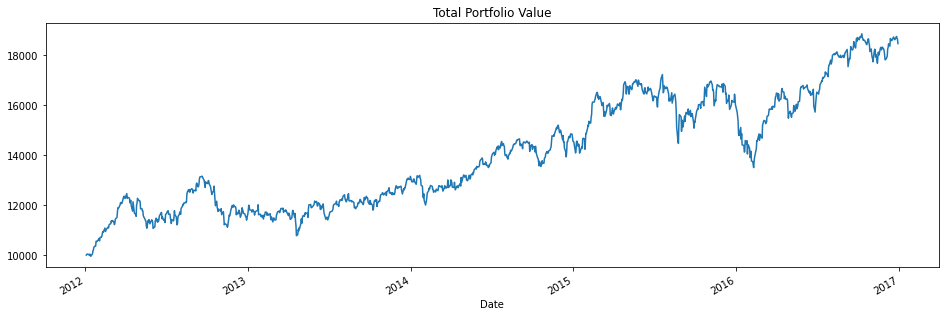

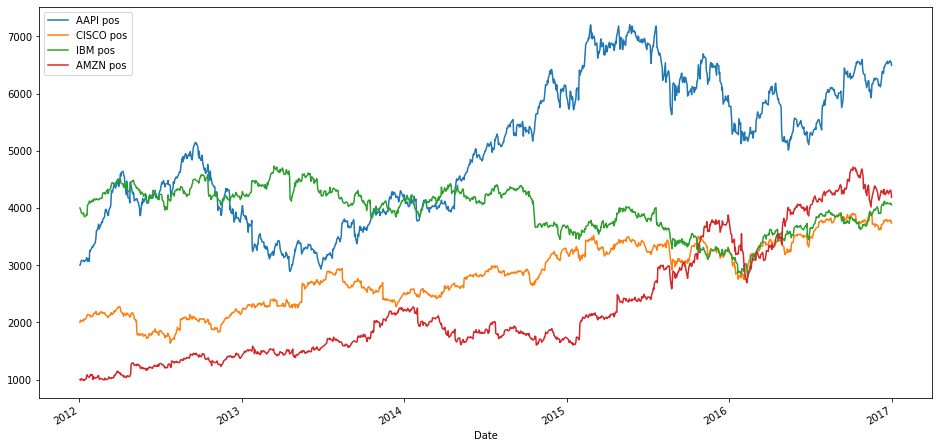

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

portfolio_val['Total pos'].plot(figsize=(16,5))
plt.title('Total Portfolio Value')

portfolio_val.drop('Total pos',axis=1).plot(figsize=(16,8))







<AxesSubplot:ylabel='Density'>

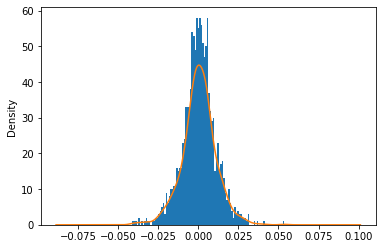

In [31]:
portfolio_val['Daily Return']=portfolio_val['Total pos'].pct_change(1)
portfolio_val.head()
portfolio_val['Daily Return'].std()
portfolio_val['Daily Return'].plot(kind='hist',bins=100) 
portfolio_val['Daily Return'].plot(kind='kde')

In [36]:
cumulative_return=100*(portfolio_val['Total pos'][-1]/portfolio_val['Total pos'][0]-1)
print(cumulative_return)
print(portfolio_val['Total pos'][-1])

#sharp ratio
SR=portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
print(SR)
#annual sharp ratio if it is 1 it is recommended to invest in stock market

ASR=(252**0.5)*SR
print(ASR)


84.74285181665546
18474.285181665546
0.05149680662648074
0.8174864618859068


In [43]:
#Portfolio Optimization
#monte carlo opti
# optmization algo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

aapl=pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco=pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm=pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn=pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)


stocks=pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns=['aapl','cisco','ibm','amzn']

print(stocks.head())
print(stocks.pct_change(1).mean())
print(stocks.pct_change(1).corr())


                 aapl      cisco         ibm    amzn
Date                                                
2012-01-03  53.063218  15.752778  160.830881  179.03
2012-01-04  53.348386  16.057180  160.174781  177.51
2012-01-05  53.940658  15.997991  159.415086  177.61
2012-01-06  54.504543  15.938801  157.584912  182.61
2012-01-09  54.418089  16.040268  156.764786  178.56
aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64
           aapl     cisco       ibm      amzn
aapl   1.000000  0.301990  0.297498  0.235487
cisco  0.301990  1.000000  0.424672  0.284470
ibm    0.297498  0.424672  1.000000  0.258492
amzn   0.235487  0.284470  0.258492  1.000000


In [45]:
# log return and arithmetic return
arith_return=stocks.pct_change(1).head()
print(arith_return.head())

log_return=np.log(stocks/stocks.shift(1))
print(log_return.head())

                aapl     cisco       ibm      amzn
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  0.005374  0.019324 -0.004079 -0.008490
2012-01-05  0.011102 -0.003686 -0.004743  0.000563
2012-01-06  0.010454 -0.003700 -0.011481  0.028152
2012-01-09 -0.001586  0.006366 -0.005204 -0.022178
                aapl     cisco       ibm      amzn
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  0.005360  0.019139 -0.004088 -0.008526
2012-01-05  0.011041 -0.003693 -0.004754  0.000563
2012-01-06  0.010400 -0.003707 -0.011547  0.027763
2012-01-09 -0.001587  0.006346 -0.005218 -0.022428


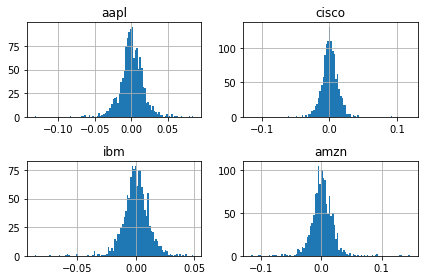

In [46]:
log_return.hist(bins=100)
plt.tight_layout()

In [48]:
print(log_return.mean()) # for each stock
#cor-correlation
#cov-covariance
print(log_return.cov()*252)
print(stocks.columns)


np.random.seed(101)
weights=np.array(np.random.random(4))
print("Random Weights:")
print(weights)

print('Rebalance')
weights=weights/np.sum(weights)
print(weights)


aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64
           aapl     cisco       ibm      amzn
aapl   0.068326  0.017854  0.014464  0.018986
cisco  0.017854  0.051381  0.018029  0.019956
ibm    0.014464  0.018029  0.035203  0.014939
amzn   0.018986  0.019956  0.014939  0.094470
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights:
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]


In [51]:
#Expected Return
print('Expected portfolio Return')
exp_return=np.sum((log_return.mean()*weights) *252)
print(exp_return)


#expected volatility
print("Expected Volatility")
exp_vol=np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
print(exp_vol)

#Sharpe Ratio
print('sharp ratio')
SR=exp_return/exp_vol
print(SR)




Expected portfolio Return
0.15599272049632004
Expected Volatility
0.18502649565909488
sharp ratio
0.8430831483926032


In [58]:
np.random.seed(101)
num_ports=5000
all_weights=np.zeros((num_ports,len(stocks.columns)))

ret_arr=np.zeros(num_ports)
vol_arr=np.zeros(num_ports)
sharpe_arr=np.zeros(num_ports)

for ind in range(num_ports):
    #weights
    weights=np.array(np.random.random(4))
    weights=weights/np.sum(weights)
    
    #Save Weights
    all_weights[ind,:]=weights
    
    #Expected_Return
    ret_arr[ind]=np.sum((log_return.mean()*weights)*252)

    #expected voltility
    vol_arr[ind]=np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    
    #Sharpe Ratio
    sharpe_arr[ind]=ret_arr[ind]/vol_arr[ind]
    
print(sharpe_arr.max())
print(sharpe_arr.argmax())

1.0303260551271067


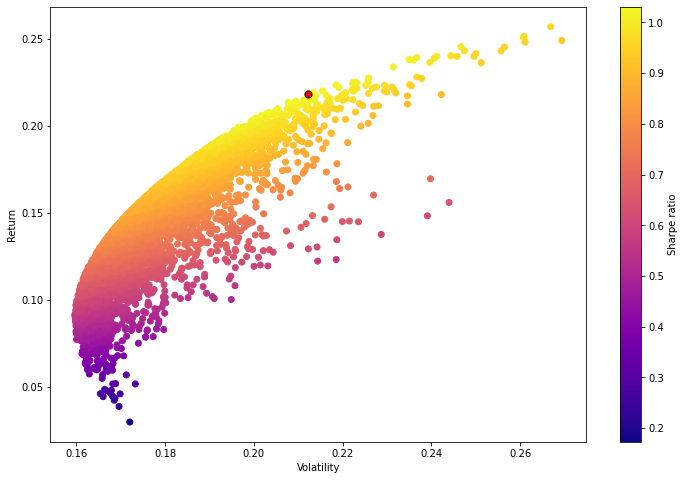

In [63]:
all_weights[1420,:]
max_sr_ret=ret_arr[1420]
max_sr_vol=vol_arr[1420]


plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [69]:

#usinf optimization algo
def get_ret_vol_sr(weights):
    weights=np.array(weights)
    ret=np.sum(log_return.mean()*weights)*252
    vol=np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    sr=ret/vol
    
    return np.array([ret,vol,sr])
    
from scipy.optimize import minimize
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2]*-1
def check_sum(weights):
    #return 0 if the sumof the weight is 1
    return np.sum(weights)-1
cons=({'type':'eq','fun':check_sum})

bounds=((0,1),(0,1),(0,1),(0,1))
init_guess=[0.25,0.25,0.25,0.25]

opt_results=minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
print(opt_results)

print(get_ret_vol_sr(opt_results.x))#returns daily return,volatility,peak sharperatio



     fun: -1.0307168703346403
     jac: array([ 5.64604998e-05,  4.18424606e-05,  3.39921728e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289779e-01, 2.04189821e-01, 3.56634752e-17, 5.29520400e-01])
[0.21885915 0.21233683 1.03071687]


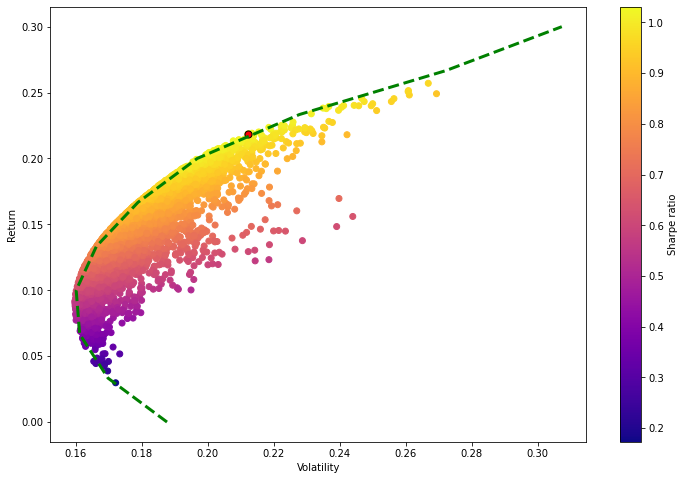

In [72]:
frontier_y=np.linspace(0,0.3,10)
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]
frontier_volatility=[]
for possible_return in frontier_y:
    cons=({'type':'eq','fun':check_sum},
          {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    result=minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    frontier_volatility.append(result['fun'])
    
#initial guess from monte carlo guess
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

In [75]:
17*3


51